In [1]:
print("Hello World")

Hello World


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [70]:
urls = ["http://www.football-data.co.uk/mmz4281/2021/all-euro-data-2020-2021.xlsx",
"http://www.football-data.co.uk/mmz4281/1920/all-euro-data-2019-2020.xlsx",
"http://www.football-data.co.uk/mmz4281/1819/all-euro-data-2018-2019.xlsx",
"http://www.football-data.co.uk/mmz4281/1718/all-euro-data-2017-2018.xlsx",
"http://www.football-data.co.uk/mmz4281/1617/all-euro-data-2016-2017.xlsx",
"http://www.football-data.co.uk/mmz4281/1516/all-euro-data-2015-2016.xlsx",
"http://www.football-data.co.uk/mmz4281/1415/all-euro-data-2014-2015.xlsx",
"http://www.football-data.co.uk/mmz4281/1314/all-euro-data-2013-2014.xlsx",
"http://www.football-data.co.uk/mmz4281/1213/all-euro-data-2012-2013.xlsx",
"http://www.football-data.co.uk/mmz4281/1112/all-euro-data-2011-2012.xlsx",
"http://www.football-data.co.uk/mmz4281/1011/all-euro-data-2010-2011.xlsx"]

In [71]:
li = []
for url in urls:
    print(url)
    xls = pd.ExcelFile(url)
    sheets = xls.sheet_names 
    for sheet in sheets:
        df = pd.read_excel(xls, sheet)
        li.append(df)

frame = pd.concat(li)

http://www.football-data.co.uk/mmz4281/2021/all-euro-data-2020-2021.xlsx
http://www.football-data.co.uk/mmz4281/1920/all-euro-data-2019-2020.xlsx
http://www.football-data.co.uk/mmz4281/1819/all-euro-data-2018-2019.xlsx
http://www.football-data.co.uk/mmz4281/1718/all-euro-data-2017-2018.xlsx
http://www.football-data.co.uk/mmz4281/1617/all-euro-data-2016-2017.xlsx
http://www.football-data.co.uk/mmz4281/1516/all-euro-data-2015-2016.xlsx
http://www.football-data.co.uk/mmz4281/1415/all-euro-data-2014-2015.xlsx
http://www.football-data.co.uk/mmz4281/1314/all-euro-data-2013-2014.xlsx
http://www.football-data.co.uk/mmz4281/1213/all-euro-data-2012-2013.xlsx
http://www.football-data.co.uk/mmz4281/1112/all-euro-data-2011-2012.xlsx
http://www.football-data.co.uk/mmz4281/1011/all-euro-data-2010-2011.xlsx


In [72]:
frame.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,2020-09-12,12:30:00,Fulham,Arsenal,0.0,3.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2020-09-12,15:00:00,Crystal Palace,Southampton,1.0,0.0,H,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2020-09-12,17:30:00,Liverpool,Leeds,4.0,3.0,H,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2020-09-12,20:00:00,West Ham,Newcastle,0.0,2.0,A,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2020-09-13,14:00:00,West Brom,Leicester,0.0,3.0,A,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
frame.shape

(82548, 141)

In [74]:
frame_select = frame[["HomeTeam","AwayTeam","Date","HTHG","HTAG","FTHG","FTAG","FTR"]]
frame_select = frame_select.dropna()
frame_select.shape

(82486, 8)

In [82]:
from pycaret.classification import *
df = frame_select[['FTR','HTHG','HTAG','HomeTeam','AwayTeam']]
clf=setup(data=df,target='FTR',use_gpu=True,log_experiment=True,train_size = 0.9) #fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.

,Description,Value
0,session_id,2733
1,Target,FTR
2,Target Type,Multiclass
3,Label Encoded,"A: 0, D: 1, H: 2"
4,Original Data,"(82486, 5)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [85]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
classifier_lightgbm=create_model('lightgbm', tree_method = 'gpu_hist', gpi_id = 0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6010,0.7789,0.5711,0.5989,0.5983,0.3780,0.3791
1,0.5979,0.7805,0.5752,0.6039,0.6003,0.3802,0.3805
2,0.5869,0.7714,0.5605,0.5914,0.5882,0.3613,0.3618
3,0.6012,0.7804,0.5774,0.6060,0.6028,0.3838,0.3843
4,0.6026,0.7763,0.5790,0.6060,0.6039,0.3865,0.3867
5,0.6025,0.7794,0.5792,0.6072,0.6041,0.3861,0.3865
6,0.6060,0.7797,0.5797,0.6044,0.6047,0.3891,0.3894
7,0.5936,0.7743,0.5707,0.5989,0.5956,0.3732,0.3735
8,0.6099,0.7848,0.5860,0.6119,0.6105,0.3969,0.3972
9,0.6069,0.7841,0.5766,0.6035,0.6043,0.3888,0.3895


In [86]:
print(classifier_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               gpi_id=0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=2733, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0, tree_method='gpu_hist')


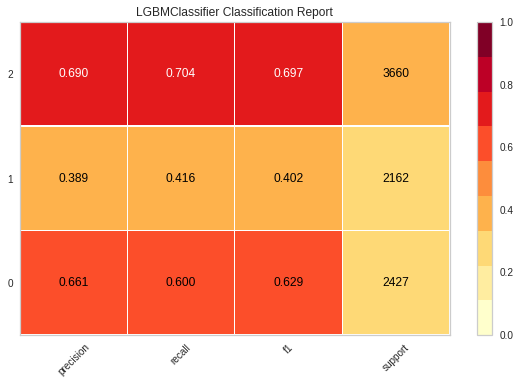

In [87]:
# Plotting the classification report
plot_model(classifier_lightgbm,plot='class_report')

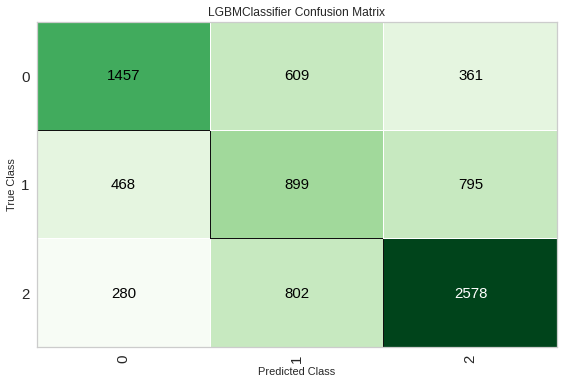

In [88]:
# Plotting the confusion matrix
plot_model(classifier_lightgbm,plot='confusion_matrix')

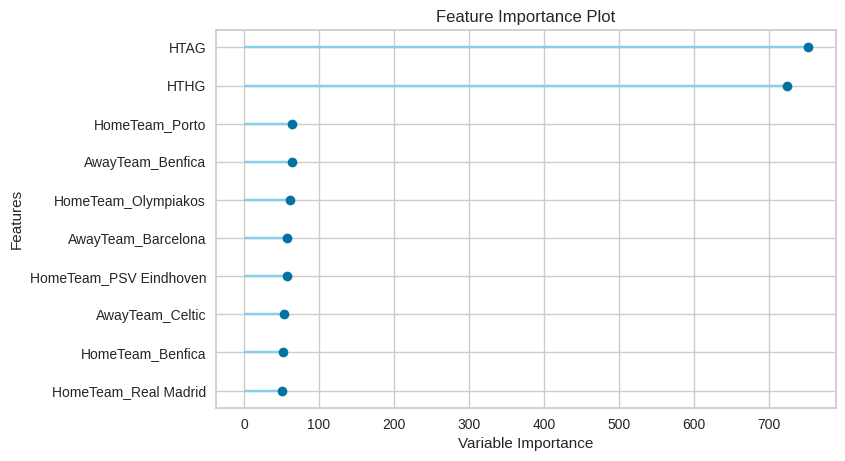

In [90]:
plot_model(classifier_lightgbm, plot='feature')
